### 20장 전이 학습을 통해 딥러닝의 성능 극대화하기

- 데이터 양이 충분하지 않을 때 활용할 수 있는 방법
- **```전이학습(Transfer Leaerning)```** : 기존의 이미지에서 학습한 정보를 가져와 프로젝트에 활용하는 것

#### 1. 소규모 데이터셋으로 만드는 강력한 학습 모델
- 딥러닝 및 머신러닝 알고리즘의 큰 2가지 유형  
    1. 지도 학습(supervised learning) 방식   
        : '클래스'라는 정답을 주고 시작하는 것 (ex. CNN, MNIST 분류 …)
    2. 비지도 학습(unsupervised learning) 방식  
        : 주어진 데이터의 특성을 찾는 것(ex. GAN, AE …)

#### 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

- **```ImageDataGenerator()```** : 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함시킴
    - **rescale**: 주어진 이미지 크기를 바꾸어 줌.
    - **horizontal_flip, vertical_flip**: 주어진 이미지를 수평 또는 수직으로 뒤집는다.
    - **zoom_range**: 정해진 범위 안에서 축소 또는 확대
    - **width_shift, height_shift**: 정해진 범위 안에서 그림을 수평 또는 수직으로 랜덤하게 평행 이동
    - **rotation_range**: 정해진 각도만큼 이미지 회전
    - **shear_range**: 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동
    - **fill_mode**: 이미지를 축소 또는 회전하거나 이동할 때 생기는 빈 공간을 어떻게 채울지 결정
        - nearest 옵션: 가장 비슷한 색으로 채워짐
    - 모든 인자를 적용하면 불필요한 데이터를 만들게 되어 오히려 학습 시간↑
- **```flow_from_directory()```**: 이미지 불러오는 함수
- **```fit_generator()```**: 실행 함수

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,    # 전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,   # 마찬가지로 위아래로 이동 
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './train',               # 학습셋이 있는 폴더 위치
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')

Found 160 images belonging to 2 classes.


In [5]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 120 images belonging to 2 classes.


In [6]:
# 앞서 배운 CNN 모델 만들어 적용하기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [8]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0002),
             metrics=['accuracy'])

In [9]:
# 모델 실행
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_generator,
    validation_steps=4
)

Epoch 1/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6871 - accuracy: 0.5620 - val_loss: 0.6710 - val_accuracy: 0.8500
Epoch 2/20
100/100 [==============================] - 14s 143ms/step - loss: 0.6647 - accuracy: 0.6080 - val_loss: 0.6226 - val_accuracy: 0.7500
Epoch 3/20
100/100 [==============================] - 14s 142ms/step - loss: 0.5716 - accuracy: 0.7140 - val_loss: 0.5461 - val_accuracy: 0.7500
Epoch 4/20
100/100 [==============================] - 14s 138ms/step - loss: 0.4385 - accuracy: 0.8120 - val_loss: 0.3018 - val_accuracy: 0.9500
Epoch 5/20
100/100 [==============================] - 14s 139ms/step - loss: 0.2885 - accuracy: 0.8860 - val_loss: 0.0933 - val_accuracy: 1.0000
Epoch 6/20
100/100 [==============================] - 14s 137ms/step - loss: 0.2239 - accuracy: 0.9200 - val_loss: 0.1239 - val_accuracy: 0.9500
Epoch 7/20
100/100 [==============================] - 14s 137ms/step - loss: 0.1816 - accuracy: 0.9360 - val_loss: 0.1332 - val_ac

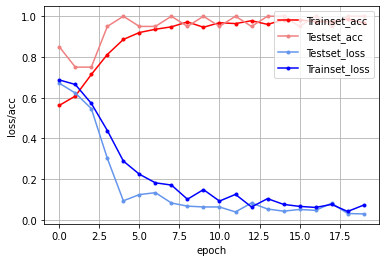

In [12]:
# 결과를 그래프로 표현하는 부분
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()